### Loading the Data (Numpy Array Dictionary) from sklearn dataset library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#Loading the dataset
from sklearn.datasets import load_digits

digits = load_digits()

Dataset Keys: dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
Dataset: (1797, 64)
Target: (1797,)


<Figure size 432x288 with 0 Axes>

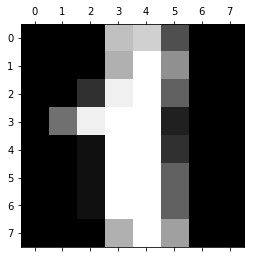

In [22]:
print("Dataset Keys:", digits.keys())
print("Dataset:", digits.data.shape)
print("Target:",digits.target.shape)

plt.gray()
plt.matshow(digits.images[1])
plt.show()

### 1. Load the dataset and split it into a training set (75%) and a test set (25%).

In [3]:
#Splitting the data into Training Set and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target,test_size=0.25,random_state=0)

#Normalizing the features
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

print("Train Dataset:", X_train.shape)
print("Train Target:", y_train.shape)

Train Dataset: (1347, 64)
Train Target: (1347,)


### 2. Train Logistic Regression model on the dataset, and print the accuracy of the model using the score method.

In [4]:
#Fitting Logistic Regression to Training Set
from sklearn.linear_model import LogisticRegression
classifierObj = LogisticRegression(random_state=0)
classifierObj.fit(X_train, y_train)
#Making predictions on the Test Set
y_pred = classifierObj.predict(X_test)
print("Logistic Regression Test Accuracy Score: " , classifierObj.score(X_test, y_test))

Logistic Regression Test Accuracy Score:  0.9622222222222222


#### 3. Train SVM with linear kernel, and print the accuracy of the model.

In [5]:
#Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj
from sklearn.svm import SVC
classifierObj = SVC(kernel='linear')
classifierObj.fit(X_train, y_train)

#Making predictions on the Test Set
y_pred = classifierObj.predict(X_test)

#Model accuracy
print("Test Accuracy of SVM with linear kernel: ", classifierObj.score(X_test, y_test))

Test Accuracy of SVM with linear kernel:  0.9733333333333334


### 4. Write a loop trying different values of degree and train SVM with poly kernel. For every value of degree, you should have an accuracy. Plot a graph with degree on x-axis and test accuracy on the y-axis. What value of degree gives you the best accuracy?

Accuracy for degree  2 :  0.9822222222222222
Accuracy for degree  5 :  0.6266666666666667
Accuracy for degree  8 :  0.26666666666666666
Accuracy for degree  11 :  0.19111111111111112
Accuracy for degree  14 :  0.18
Accuracy for degree  17 :  0.1688888888888889
Accuracy for degree  20 :  0.16666666666666666


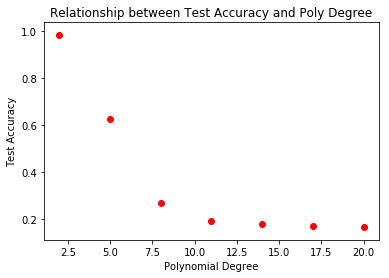

In [6]:
# range(start, stop[, step]) -> range object
#Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj - poly
degree = []
accuracy = []
for n in range(2,22,3):
 degree.append(n)
 classifierObj = SVC(kernel='poly', degree=n)
 classifierObj.fit(X_train, y_train)
 print("Accuracy for degree ", n, ": ", classifierObj.score(X_test, y_test))
 accuracy.append(classifierObj.score(X_test, y_test))

#Visual Exploration of Training Set
plt.scatter(degree, accuracy,color='red')
plt.title('Relationship between Test Accuracy and Poly Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('Test Accuracy')
plt.show()
# Degree 2 gives me the best accuracy of 98.22%

##### SVM with Polynomial Degree 2 gives me the best accuracy of 98.22%

### 5. Train SVM with RBF kernel, and print the accuracy of the model.

In [7]:
#Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj - Default RBF kernel
classifierObj = SVC()
classifierObj.fit(X_train, y_train)

#Making predictions on the Test Set
y_pred = classifierObj.predict(X_test)

#Model accuracy
print("Accuracy of SVM with RBF kernel model: ", classifierObj.score(X_test, y_test))

Accuracy of SVM with RBF kernel model:  0.9844444444444445


### 6. Write a loop trying different values of k and perform classification using k-NN. For every value of k, you should have an accuracy. Plot a graph with k on the x-axis and the test accuracy on the y-axis. What value of k gives you the best accuracy?

k =  2 :  0.9666666666666667
k =  8 :  0.9688888888888889
k =  14 :  0.9644444444444444
k =  20 :  0.9533333333333334
k =  26 :  0.9511111111111111


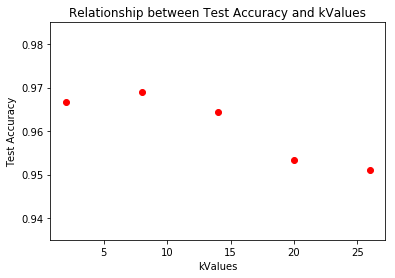

In [8]:
#Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj - k-NN
from sklearn.neighbors import KNeighborsClassifier
kValues = []
accuracy = []
for k in range(2,30,6):
 kValues.append(k)
 classifierObj = KNeighborsClassifier(n_neighbors=k, p=2, metric='minkowski')
 classifierObj.fit(X_train, y_train)
 print("k = ", k, ": ", classifierObj.score(X_test, y_test))
 accuracy.append(classifierObj.score(X_test, y_test))

#Making predictions on the Test Set
y_pred = classifierObj.predict(X_test)

import matplotlib.pyplot as plt
#Visual Exploration of Training Set
plt.scatter(kValues,accuracy,color='red')
plt.title('Relationship between Test Accuracy and kValues')
plt.xlabel('kValues')
plt.ylabel('Test Accuracy')
plt.show()

# k value 8 gives me the best accuracy of 96.89%

##### Using KNeighborsClassifier, k = 8 gives me the best accuracy of 96.89%

### 7. Train Naïve Bayes Model, and print the accuracy of the model.

In [9]:
#Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj
from sklearn.naive_bayes import GaussianNB
classifierObj = GaussianNB()
classifierObj.fit(X_train, y_train)

#Making predictions on the Test Set
y_pred = classifierObj.predict(X_test)

#Model accuracy
print("Test Accuracy of Naive Bayes model: ", classifierObj.score(X_test, y_test))

Test Accuracy of Naive Bayes model:  0.7733333333333333


### 8. Train Decision Tree, and print the accuracy of the model.

In [10]:
#Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj
from sklearn.tree import DecisionTreeClassifier
classifierObj = DecisionTreeClassifier(criterion='entropy')
classifierObj.fit(X_train,y_train)

#Making predictions on the Test Set
y_pred = classifierObj.predict(X_test)

#Model accuracy -> model got correct results
print("Test Accuracy of Decision tree model: ", classifierObj.score(X_test, y_test))

Test Accuracy of Decision tree model:  0.8288888888888889


### 9. Write a loop to train Random Forest with different values of n_estimators. For every value of n_estimators you should have an accuracy. Plot a graph with n_estimators on the x-axis and the test accuracy on the y-axis. What value of n_estimators gives you the best accuracy?

n_estimators = 1 :  0.7422222222222222
n_estimators = 17 :  0.9688888888888889
n_estimators = 33 :  0.9666666666666667
n_estimators = 49 :  0.9777777777777777
n_estimators = 65 :  0.9688888888888889
n_estimators = 81 :  0.9733333333333334
n_estimators = 97 :  0.98
n_estimators = 113 :  0.9711111111111111
n_estimators = 129 :  0.9711111111111111
n_estimators = 145 :  0.9733333333333334


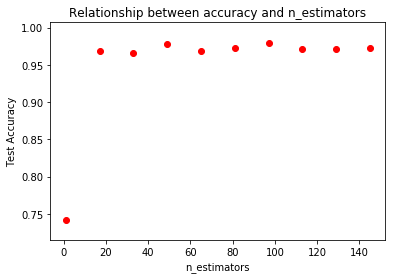

In [21]:
#Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj
from sklearn.ensemble import RandomForestClassifier
n_estimators = []
accuracy = []
for n in range(1,150,16):
 n_estimators.append(n)
 classifierObj = RandomForestClassifier(n_estimators=n, criterion='entropy')
 classifierObj.fit(X_train,y_train)
 print("n_estimators =", n, ": ", classifierObj.score(X_test, y_test))
 accuracy.append(classifierObj.score(X_test, y_test))

#Making predictions on the Test Set
y_pred = classifierObj.predict(X_test)


import matplotlib.pyplot as plt
#Visual Exploration of Training Set
plt.scatter(n_estimators,accuracy,color='red')
plt.title('Relationship between accuracy and n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Test Accuracy')
plt.show()

# n_estimators accuracy stays stable around  98.00%

##### Using RandomForestClassifier, # n_estimators accuracy stays stable around  98.00%